# -------------------------------WEEK - 05------------------------------------

# Missing values and Outlairs.

In [1]:
# Import the libraris 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read csv file 

df=pd.read_csv("C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Missing values 

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Handle the missing values using Mean , Median and Mode.

In [4]:
# Using Mean value.

mean=df['age'].mean()
mean

np.float64(29.69911764705882)

In [5]:
df['age']=df['age'].fillna(mean)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Using Mode value. 

mode=df['deck'].mode()
mode

0    C
Name: deck, dtype: object

In [8]:
df['deck']=df['deck'].fillna(mode)[0]

In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
# Mode value. 

me=df['embarked'].mode()
me

0    S
Name: embarked, dtype: object

In [11]:
df['embarked']=df['embarked'].fillna(me)[0]

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [14]:
mo=df['embark_town'].mode()
mo

0    Southampton
Name: embark_town, dtype: object

In [15]:
df['embark_town']=df['embark_town'].fillna(mo)[0]

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Handle the outlairs using IQR method.

## Check the outlairs .

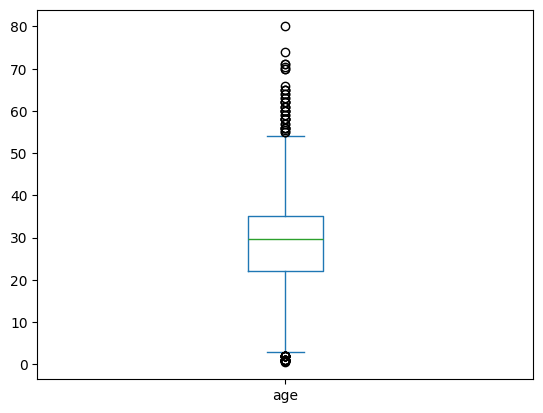

In [17]:
df['age'].plot(kind='box')
plt.show()

## Fill the the outlairs using IQR.

In [19]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)

iqr=q3-q1 

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr) 

a_arr=df['age']
out=a_arr[(a_arr<=lower_bound) | (a_arr>=upper_bound)]
print(out) 

age_arr=df['age']
low_cap=np.percentile(age_arr,1)
up_cap=np.percentile(age_arr,99) 

for i in df['age']:
     if i<lower_bound:
         df['age']=df['age'].replace (i,low_cap)
     elif i > upper_bound:
         df['age']=df['age'].replace (i,up_cap)

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64


<Axes: >

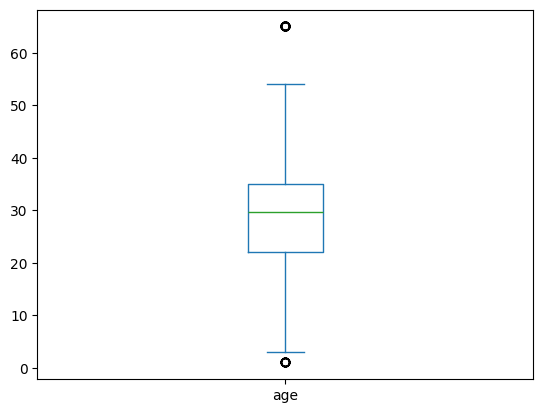

In [20]:
df['age'].plot (kind='box')